In [0]:
!pip install PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
download = drive.CreateFile({'id': '1F8YRK9EZnQknmeiTBvTODbmlnEI4zQF1'})
download.GetContentFile('Multi_label_dataset.zip')

In [0]:
!rm -rf /content/Multi_Label_dataset

In [0]:
import shutil
shutil.move("/Multi_label_dataset.zip","/content")

'/content/Multi_label_dataset.zip'

In [0]:
!unzip /content/Multi_label_dataset.zip

Archive:  /content/Multi_label_dataset.zip
   creating: Multi_Label_dataset/
   creating: Multi_Label_dataset/Images/
  inflating: Multi_Label_dataset/Images/tt0094871.jpg  
  inflating: Multi_Label_dataset/Images/tt0095289.jpg  
  inflating: Multi_Label_dataset/Images/tt0095311.jpg  
  inflating: Multi_Label_dataset/Images/tt0096246.jpg  
  inflating: Multi_Label_dataset/Images/tt0096657.jpg  
  inflating: Multi_Label_dataset/Images/tt0096769.jpg  
  inflating: Multi_Label_dataset/Images/tt0096804.jpg  
  inflating: Multi_Label_dataset/Images/tt0096869.jpg  
  inflating: Multi_Label_dataset/Images/tt0096911.jpg  
  inflating: Multi_Label_dataset/Images/tt0096913.jpg  
  inflating: Multi_Label_dataset/Images/tt0096918.jpg  
  inflating: Multi_Label_dataset/Images/tt0096926.jpg  
  inflating: Multi_Label_dataset/Images/tt0096943.jpg  
  inflating: Multi_Label_dataset/Images/tt0096951.jpg  
  inflating: Multi_Label_dataset/Images/tt0096952.jpg  
  inflating: Multi_Label_dataset/Images/tt

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

Using TensorFlow backend.


In [0]:
train = pd.read_csv('/content/Multi_Label_dataset/train.csv')    # reading the csv file
train.head()  

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0097981,"['Horror', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,tt0097142,"['Drama', 'Comedy']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tt0097770,"['Action', 'Crime', 'Drama']",1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0097116,"['Comedy', 'Romance']",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,tt0098258,"['Comedy', 'Drama', 'Romance']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [0]:
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

# Loading and Pre-processing the data

In [0]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('/content/Multi_Label_dataset/Images/'+train['Id'][i]+'.jpg',target_size=(250,250,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

In [0]:
X.shape

(6254, 150, 150, 3)

In [0]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
y.shape

(6254, 25)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(450,450,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 146, 146, 16)      1216      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 16)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 69, 69, 32)        12832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 64)        51264     
__________

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Instructions for updating:
Use tf.cast instead.
Train on 5628 samples, validate on 626 samples
Epoch 1/10
1920/5628 [=========>....................] - ETA: 2:55 - loss: 0.4943 - acc: 0.7715

KeyboardInterrupt: ignored

In [0]:
img = image.load_img('/content/got.jpg',target_size=(100,100,3))
img = image.img_to_array(img)
img = img/255

Drama (0.534)
Action (0.29)
Thriller (0.269)


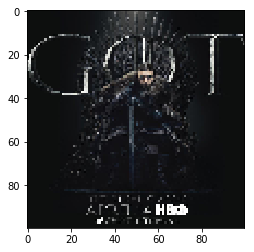

In [0]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,100,100,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [0]:
img = image.load_img('/content/game-of-thrones.jpg',target_size=(100,100,3))
img = image.img_to_array(img)
img = img/255

Drama (0.529)
Action (0.281)
Crime (0.248)


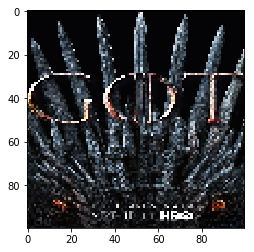

In [0]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,100,100,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [0]:
img = image.load_img('/content/Bajirao_Mastani_poster.jpg',target_size=(100,100,3))
img = image.img_to_array(img)
img = img/255

Drama (0.525)
Action (0.264)
Crime (0.233)


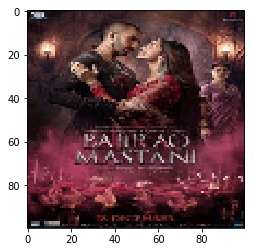

In [0]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,100,100,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [0]:
img = image.load_img('/content/golmal.jpg',target_size=(100,100,3))
img = image.img_to_array(img)
img = img/255

Drama (0.505)
Comedy (0.499)
Romance (0.235)


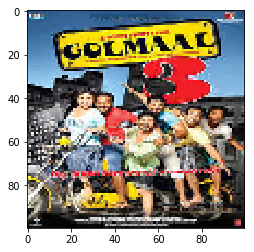

In [0]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,100,100,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [0]:
img = image.load_img('/content/avengers.jpg',target_size=(100,100,3))
img = image.img_to_array(img)
img = img/255

Drama (0.508)
Comedy (0.451)
Romance (0.218)


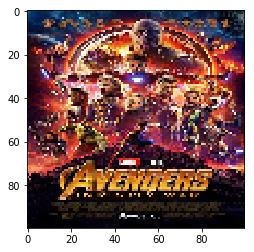

In [0]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,100,100,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [0]:
img = image.load_img('/content/avn.jpg',target_size=(100,100,3))
img = image.img_to_array(img)
img = img/255

Drama (0.524)
Action (0.255)
Comedy (0.236)


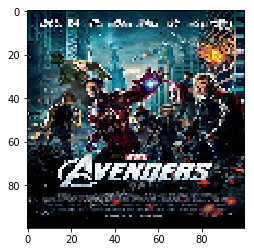

In [0]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,100,100,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [0]:
img = image.load_img('/content/sg.jpg',target_size=(100,100,3))
img = image.img_to_array(img)
img = img/255

Drama (0.533)
Action (0.284)
Thriller (0.256)


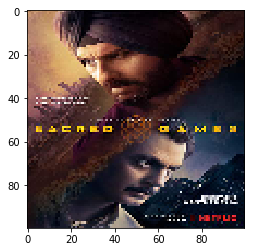

In [0]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,100,100,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)